In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt 
import plotly.express as px
data= pd.read_csv("../input/spam-detection/dataset2.csv")
data['Result']= data['Result'].replace([-1], 0)
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [53]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [55]:
from sklearn.model_selection import train_test_split
X= data.values
y=data['Result'].values
X= data.drop(['Result'], axis=1)
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)

In [56]:
from sklearn import tree
dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)
print(dtc.score(x_test, y_test))

0.9234247814290021


In [57]:
from sklearn import ensemble
rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
x_trainpred=rfc.predict(x_train)
train_acc=accuracy_score( y_train, x_trainpred)
print(train_acc)
rfc.fit(x_train, y_train)
print(rfc.score(x_test, y_test))

1.0
0.964124208622249


In [58]:
gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(x_train, y_train)
gd.score(x_test, y_test)

0.9303587579137775

In [59]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6150135664757311

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
LR=LogisticRegression()
rfe2= RFE(LR, verbose=1)
rfe2.fit(x_train, y_train)
x_train_selected= rfe2.transform(x_train)
x_test_selected= rfe2.transform(x_test)
rfe2.support_

Fitting estimator with 31 features.
Fitting estimator with 30 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False])

In [61]:
x_train.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report'],
      dtype='object')

In [62]:
print(len (rfe2.support_))

31


Score with all features: 0.594
Score with selected features :0.929
Precision: 0.933
Recall: 0.938
Accuracy: 0.929
F1 Score: 0.935


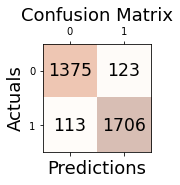

In [63]:

x_test_selected= rfe2.transform(x_test)
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(knn.score(x_test, y_test)))
knn.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(knn.score(x_test_selected, y_test)))
y_pred= knn.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Score with all features: 0.755
Score with selected features :0.920
Precision: 0.913
Recall: 0.943
Accuracy: 0.920
F1 Score: 0.928


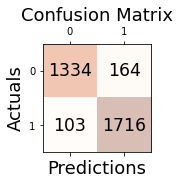

In [64]:


from sklearn.svm import LinearSVC
svm= LinearSVC()
svm.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(svm.score(x_test, y_test)))
svm.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(svm.score(x_test_selected, y_test)))
y_pred= svm.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.950
Score with selected features :0.950
Precision: 0.952
Recall: 0.957
Accuracy: 0.950
F1 Score: 0.955


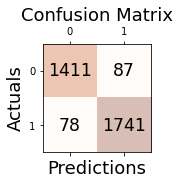

In [65]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(DT.score(x_test, y_test)))
DT.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(DT.score(x_test_selected, y_test)))
y_pred= DT.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.886
Score with selected features :0.595
Precision: 1.000
Recall: 0.261
Accuracy: 0.595
F1 Score: 0.413


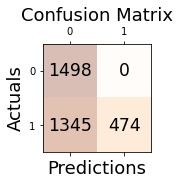

In [66]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()
NB.fit(x_train,y_train)
print("Score with all features: {:,.3f}".format(NB.score(x_test, y_test)))
NB.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(NB.score(x_test_selected, y_test)))
y_pred= NB.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.967
Score with selected features :0.956
Precision: 0.950
Recall: 0.970
Accuracy: 0.956
F1 Score: 0.960


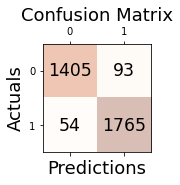

In [67]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(RF.score(x_test, y_test)))
RF.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(RF.score(x_test_selected, y_test)))
y_pred= RF.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.548
Score with selected features :0.913
Precision: 0.901
Recall: 0.944
Accuracy: 0.913
F1 Score: 0.922


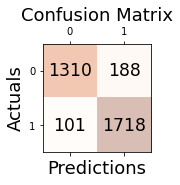

In [68]:
from sklearn.svm import SVC

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(svmrbf.score(x_test, y_test)))
svmrbf.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(svmrbf.score(x_test_selected, y_test)))
y_pred= svmrbf.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.548
Score with selected features :0.940
Precision: 0.925
Recall: 0.970
Accuracy: 0.940
F1 Score: 0.947


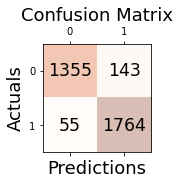

In [69]:
from sklearn.svm import SVC
svmpol = SVC(kernel='poly')
svmpol.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(svmpol.score(x_test, y_test)))
svmpol.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(svmpol.score(x_test_selected, y_test)))
y_pred= svmpol.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.920
Score with selected features :0.920
Precision: 0.909
Recall: 0.948
Accuracy: 0.920
F1 Score: 0.928


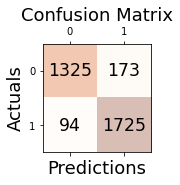

In [70]:
from sklearn.svm import SVC
svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(svmlin.score(x_test, y_test)))
svmlin.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(svmlin.score(x_test_selected, y_test)))
y_pred= svmlin.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Score with all features: 0.920
Score with selected features :0.920
Precision: 0.909
Recall: 0.948
Accuracy: 0.920
F1 Score: 0.928


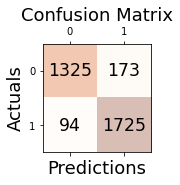

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [71]:
gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(x_train, y_train)
gd.score(x_test, y_test)
gd = SVC(kernel='linear', gamma='auto')
gd.fit(x_train, y_train)
print("Score with all features: {:,.3f}".format(gd.score(x_test, y_test)))
gd.fit(x_train_selected, y_train)
print("Score with selected features :{:,.3f}".format(gd.score(x_test_selected, y_test)))
y_pred= gd.predict(x_test_selected)
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

gd.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': gd.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)


In [ ]:
dropcols1=data.drop(data.iloc[:, 13:30], axis=1)

addressbarfeaturess=pd.DataFrame(dropcols1)
addressbarfeaturess.head()

In [ ]:
dropcols2=data.drop(data.iloc[:, 1:24], axis=1)

domainfeatures=pd.DataFrame(dropcols2)
domainfeatures.head()

In [ ]:
dropcols3=data.drop(data.iloc[:, 1:19], axis=1)
dropcols3=dropcols3.drop(data.iloc[:, 24:31], axis=1)
HTMLJS=pd.DataFrame(dropcols3)
HTMLJS.head()

In [ ]:
dropcols4=data.drop(data.iloc[:, 1:13], axis=1)
dropcols4=dropcols4.drop(data.iloc[:, 19:31], axis=1)
abnormalfeatures=pd.DataFrame(dropcols4)
abnormalfeatures.head()

In [ ]:
addressdomain= pd.concat([addressbarfeaturess, domainfeatures], axis=1)
addressdomain.head()

In [ ]:

Xaddom= addressdomain.values
yaddom=addressdomain['Result'].values
Xaddom= addressdomain.drop(['Result', 'index'], axis=1)
xaddom_train, xaddom_test, yaddom_train, yaddom_test= train_test_split(Xaddom, yaddom, test_size= 0.3, random_state=0)

In [ ]:
from sklearn import ensemble
rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xaddom_train, y_train)
print("Random forest classifier score when combining addressbar features & domain features: {:,.3f}".format(rfc.score(xaddom_test, y_test)))

gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xaddom_train, y_train)
print("GradientBoosting score when combining addressbar features & domain features: {:,.3f}".format(gd.score(xaddom_test, y_test)))
knn= KNeighborsClassifier()
knn.fit(xaddom_train, y_train)
print("KNN score when combining addressbar features & domain features: {:,.3f}".format(knn.score(xaddom_test, y_test)))
dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xaddom_train, y_train)
print("Decision Tree score when combining addressbar features & domain features: {:,.3f}".format(dtc.score(xaddom_test, y_test)))
NB= GaussianNB()
NB.fit(xaddom_train, y_train)
print("Naive bayes score when combining addressbar features & domain features {:,.3f}".format(NB.score(xaddom_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xaddom_train, y_train)
print("Support vector (RBF) score when combining addressbar features & domain features: {:,.3f}".format(svmrbf.score(xaddom_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xaddom_train, y_train)
print("Support vector (Poly) score when combining addressbar features & domain features: {:,.3f}".format(svmpol1.score(xaddom_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xaddom_train, y_train)
print("Support vector (linear) score when combining addressbar features & domain features: {:,.3f}".format(svmlin.score(xaddom_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xaddom_train, y_train)
print("Logistic Regression score when combining addressbar features & domain features: {:,.3f}".format(LR.score(xaddom_test, y_test)))

In [ ]:
addressHTMLJS= pd.concat([addressbarfeaturess, HTMLJS], axis=1)
addressHTMLJS.head()

In [ ]:
Xjs= addressHTMLJS.values
yjs=addressHTMLJS['Result'].values
Xjs= addressHTMLJS.drop(['Result', 'index'], axis=1)
xjs_train, xjs_test, yjs_train, yjs_test= train_test_split(Xjs, yjs, test_size= 0.3, random_state=0)

In [ ]:

rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xjs_train, y_train)
print("Random forest classifier score when combining HTML AND JS with Address bar features: {:,.3f}".format(rfc.score(xjs_test, y_test)))

gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xjs_train, y_train)
print("GradientBoosting score when combining HTML AND JS with Address bar features: {:,.3f}".format(gd.score(xjs_test, y_test)))
knn= KNeighborsClassifier()
knn.fit(xjs_train, y_train)
print("KNN score when combining HTML AND JS with Address bar features: {:,.3f}".format(knn.score(xjs_test, y_test)))
dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xjs_train, y_train)
print("Decision Tree score when combining HTML AND JS with Address bar features: {:,.3f}".format(dtc.score(xjs_test, y_test)))
NB= GaussianNB()
NB.fit(xjs_train, y_train)
print("Naive bayes score when combining HTML AND JS with Address bar features {:,.3f}".format(NB.score(xjs_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xjs_train, y_train)
print("Support vector (RBF) score when combining HTML AND JS with Address bar features: {:,.3f}".format(svmrbf.score(xjs_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xjs_train, y_train)
print("Support vector (Poly) score when combining HTML AND JS with Address bar features: {:,.3f}".format(svmpol1.score(xjs_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xjs_train, y_train)
print("Support vector (linear) score when combining HTML AND JS with Address bar features: {:,.3f}".format(svmlin.score(xjs_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xjs_train, y_train)
print("Logistic Regression score when combining HTML AND JS with Address bar features: {:,.3f}".format(LR.score(xjs_test, y_test)))

In [ ]:
addressabnormal= pd.concat([addressbarfeaturess, abnormalfeatures], axis=1)
addressabnormal.head()

In [ ]:
Xaddab= addressabnormal.values
yaddab=addressabnormal['Result'].values
Xaddab= addressabnormal.drop(['Result', 'index'], axis=1)
xaddab_train, xaddab_test, yaddab_train, yaddab_test= train_test_split(Xaddab, yaddab, test_size= 0.3, random_state=0)

In [ ]:
gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xaddab_train, y_train)
print("GradientBoostingClassifier score when combining Abnormal features with Address bar features: {:,.3f}".format(gd.score(xaddab_test, y_test)))

NB= GaussianNB()
NB.fit(xaddab_train, y_train)
print("Naive bayes score when combining Abnormal features with Address bar features: {:,.3f}".format(NB.score(xaddab_test, y_test)))

knn= KNeighborsClassifier()
knn.fit(xaddab_train, y_train)
print("KNN score  when combining Abnormal features with Address bar features: {:,.3f}".format(knn.score(xaddab_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xaddab_train, y_train)
print("Support vector (RBF) score when combining Abnormal features with Address bar features: {:,.3f}".format(svmrbf.score(xaddab_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xaddab_train, y_train)
print("Support vector (Poly) score when combining Abnormal features with Address bar features: {:,.3f}".format(svmpol1.score(xaddab_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xaddab_train, y_train)
print("Support vector (linear) score when combining  Abnormal features with Address bar features: {:,.3f}".format(svmlin.score(xaddab_test, y_test)))

rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xaddab_train, y_train)
print("Random forest classifier score when combining Abnormal features with Address bar features: {:,.3f}".format(rfc.score(xaddab_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xaddab_train, y_train)
print("Logistic Regression score when combining Abnormal features with Address bar features: {:,.3f}".format(LR.score(xaddab_test, y_test)))

dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xaddab_train, y_train)
print("Decision Tree score when combining Abnormal features with Address bar features: {:,.3f}".format(dtc.score(xaddab_test, y_test)))

In [ ]:
domab= pd.concat([domainfeatures, abnormalfeatures ], axis=1)
domab.head()

In [ ]:
Xdomab= domab.values
ydomab=domab['Result'].values
Xdomab= domab.drop(['Result', 'index'], axis=1)
xdomab_train, xdomab_test, ydomab_train, ydomab_test= train_test_split(Xdomab, ydomab, test_size= 0.3, random_state=0)

In [ ]:
gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xdomab_train, y_train)
print("GradientBoostingClassifier score when combining Abnormal features with Domain features: {:,.3f}".format(gd.score(xdomab_test, y_test)))

from sklearn import ensemble
rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xdomab_train, y_train)
print("Random forest classifier score when combining Abnormal features with Domain features: {:,.3f}".format(rfc.score(xdomab_test, y_test)))

NB= GaussianNB()
NB.fit(xdomab_train, y_train)
print("Random forest classifier score when combining Abnormal features with Address bar features: {:,.3f}".format(NB.score(xdomab_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xdomab_train, y_train)
print("Logistic Regression score when combining Abnormal features with Domain features: {:,.3f}".format(LR.score(xdomab_test, y_test)))

dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xdomab_train, y_train)
print("Decision Tree score when combining Abnormal features with Domain features: {:,.3f}".format(dtc.score(xdomab_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xdomab_train, y_train)
print("Support vector (linear) score when combining  Abnormal features with Domain features: {:,.3f}".format(svmlin.score(xdomab_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xdomab_train, y_train)
print("Support vector (Poly) score when combining Abnormal features with Domain features: {:,.3f}".format(svmpol1.score(xdomab_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xdomab_train, y_train)
print("Support vector (RBF) score when combining Abnormal features with Domain features: {:,.3f}".format(svmrbf.score(xdomab_test, y_test)))

knn= KNeighborsClassifier()
knn.fit(xdomab_train, y_train)
print("KNN score  when combining Abnormal features with Domain features: {:,.3f}".format(knn.score(xdomab_test, y_test)))

In [ ]:
domHJS= pd.concat([domainfeatures, HTMLJS ], axis=1)
domHJS.head()

In [ ]:
XdomHJS= domHJS.values
ydomHJS=domHJS['Result'].values
XdomHJS= domHJS.drop(['Result','index'], axis=1)
xdomHJS_train, xdomHJS_test, ydomHJS_train, ydomHJS_test= train_test_split(XdomHJS, ydomHJS, test_size= 0.3, random_state=0)

In [ ]:
from sklearn import ensemble
rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xdomHJS_train, y_train)
print("Random forest classifier score when combining HTML AND JS with Domain features: {:,.3f}".format(rfc.score(xdomHJS_test, y_test)))

gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xdomHJS_train, y_train)
print("GradientBoosting score when combining HTML AND JS with Domain features: {:,.3f}".format(gd.score(xdomHJS_test, y_test)))

knn= KNeighborsClassifier()
knn.fit(xdomHJS_train, y_train)
print("KNN score when combining HTML AND JS with Domain features: {:,.3f}".format(knn.score(xdomHJS_test, y_test)))

dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xdomHJS_train, y_train)
print("Decision Tree score when combining HTML AND JS with Domain features: {:,.3f}".format(dtc.score(xdomHJS_test, y_test)))

NB= GaussianNB()
NB.fit(xdomHJS_train, y_train)
print("Naive bayes score when combining HTML AND JS  with Domain features {:,.3f}".format(NB.score(xdomHJS_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xdomHJS_train, y_train)
print("Support vector (RBF) score when combining HTML AND JS with Domain features: {:,.3f}".format(svmrbf.score(xdomHJS_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xdomHJS_train, y_train)
print("Support vector (Poly) score when combining HTML AND JS with Domain features: {:,.3f}".format(svmpol1.score(xdomHJS_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xdomHJS_train, y_train)
print("Support vector (linear) score when combining HTML AND JS with Domain features: {:,.3f}".format(svmlin.score(xdomHJS_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xdomHJS_train, y_train)
print("Logistic Regression score when combining HTML AND JS with Domain features: {:,.3f}".format(LR.score(xdomHJS_test, y_test)))

In [ ]:
abHJ= pd.concat([abnormalfeatures, HTMLJS ], axis=1)
abHJ.head()

In [ ]:
XabHJ= abHJ.values
yabHJ=abHJ['Result'].values
XabHJ= abHJ.drop(['Result', 'index'], axis=1)
xabHJ_train, xabHJ_test, yabHJ_train, yabHJ_test= train_test_split(XabHJ, yabHJ, test_size= 0.3, random_state=0)

In [ ]:
from sklearn import ensemble
rfc=ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xabHJ_train, y_train)
print("Random forest classifier score when combining abnormal features with HTML & JS: {:,.3f}".format(rfc.score(xabHJ_test, y_test)))

gd=ensemble.GradientBoostingClassifier(n_estimators=40)
gd.fit(xabHJ_train, y_train)
print("GradientBoosting score when combining abnormal features with HTML & JS: {:,.3f}".format(gd.score(xabHJ_test, y_test)))

knn= KNeighborsClassifier()
knn.fit(xabHJ_train, y_train)
print("KNN score when combining abnormal features with HTML & JS: {:,.3f}".format(knn.score(xabHJ_test, y_test)))

dtc= tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(xabHJ_train, y_train)
print("Decision Tree score when combining abnormal features with HTML & JS: {:,.3f}".format(dtc.score(xabHJ_test, y_test)))

NB= GaussianNB()
NB.fit(xabHJ_train, y_train)
print("Naive bayes score when combining abnormal features  with HTML & JS {:,.3f}".format(NB.score(xabHJ_test, y_test)))

svmrbf = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svmrbf.fit(xabHJ_train, y_train)
print("Support vector (RBF) score when combining abnormal features with HTML & JS: {:,.3f}".format(svmrbf.score(xabHJ_test, y_test)))

svmpol1 = SVC(kernel='poly')
svmpol1.fit(xabHJ_train, y_train)
print("Support vector (Poly) score when combining abnormal features with HTML & JS: {:,.3f}".format(svmpol1.score(xabHJ_test, y_test)))

svmlin = SVC(kernel='linear', gamma='auto')
svmlin.fit(xabHJ_train, y_train)
print("Support vector (linear) score when combining abnormal features with HTML & JS: {:,.3f}".format(svmlin.score(xabHJ_test, y_test)))

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xabHJ_train, y_train)
print("Logistic Regression score when combining abnormal features with HTML & JS: {:,.3f}".format(LR.score(xabHJ_test, y_test)))

In [ ]:
x_data = data.iloc [:, 1:32]
df=pd.DataFrame({"Features Name": x_data.columns, "Feature Importance": list(rfe2.support_)})
important_features=df.sort_values(["Feature Importance"], ascending=  False)
important_features.head(15)